# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Kristover Armand
- Email: mkarmand43@gmail.com
- Id Dicoding: mk_armand_13

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('data.csv')
df

,Marital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...
...,...
4419,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4420,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4421,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4422,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


In [3]:
# Membaca file dengan delimiter titik koma
file_path = "data.csv"
df = pd.read_csv(file_path, sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


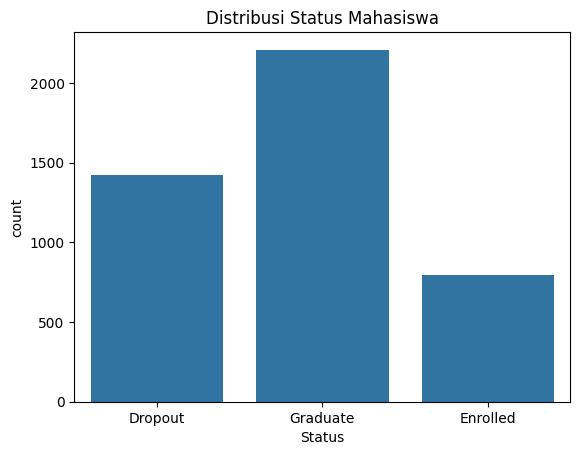

In [6]:
sns.countplot(data=df, x='Status')
plt.title("Distribusi Status Mahasiswa")
plt.show()

<Figure size 1800x1500 with 0 Axes>

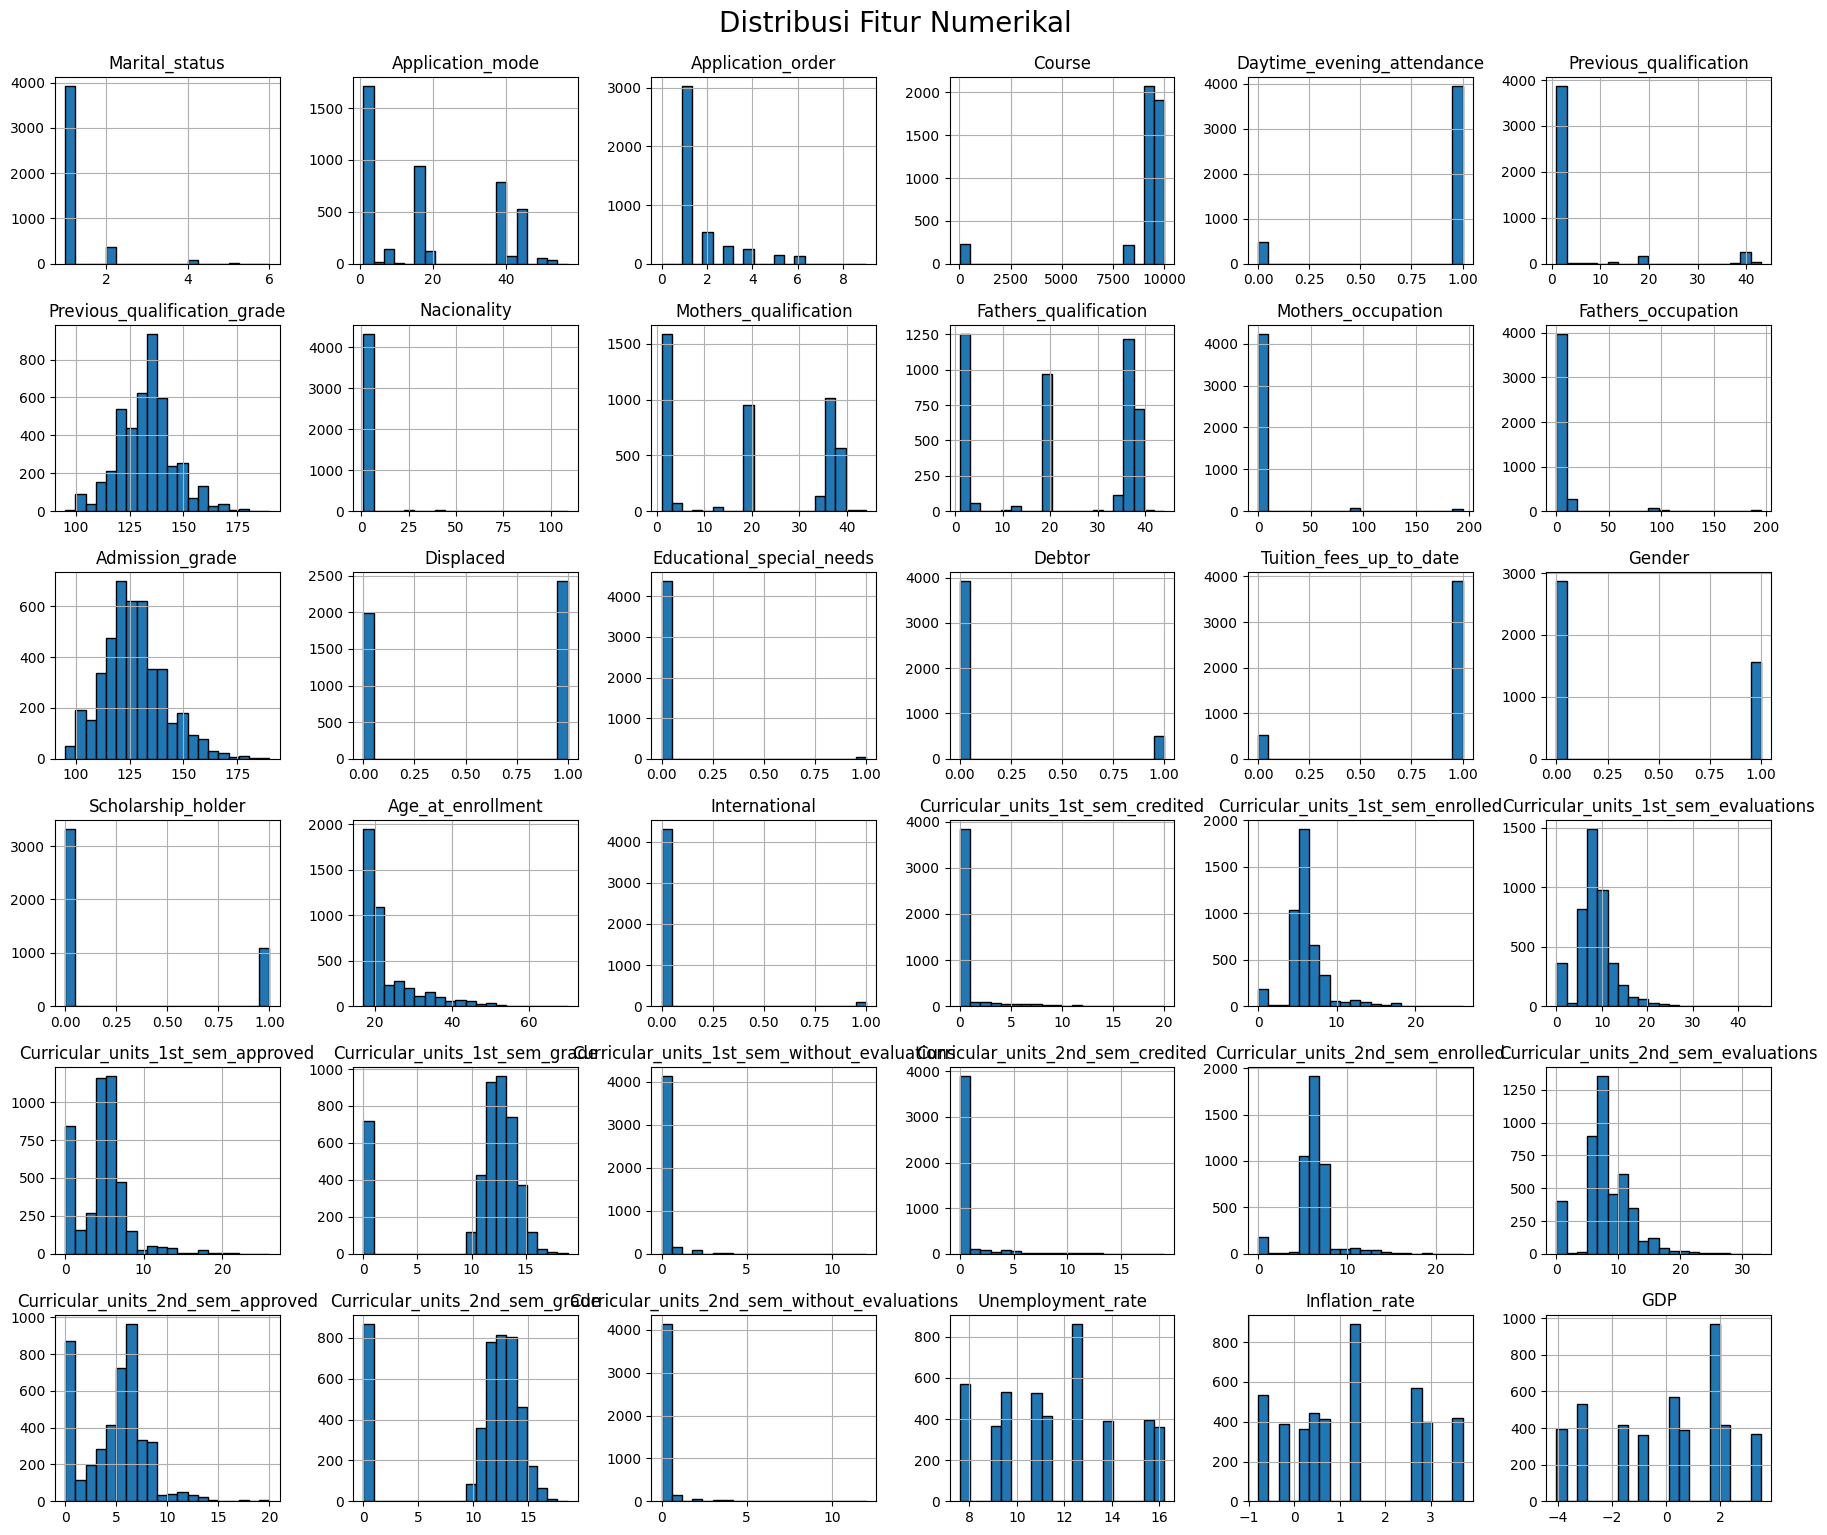

In [7]:
# Pilih kolom numerik
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Tentukan ukuran figure dan grid
plt.figure(figsize=(18, 15))
df[numerical_cols].hist(bins=20, layout=(6, 6), figsize=(18, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerikal", fontsize=20, y=1.02)
plt.show()

In [8]:
# Tampilkan nilai minimum dan maksimum
df[numerical_cols].agg(['min', 'max'])

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
min,1,1,0,33,0,1,95.0,1,1,1,...,0,0,0,0,0,0.000000,0,7.6,-0.8,-4.06
max,6,57,9,9991,1,43,190.0,109,44,44,...,12,19,23,33,20,18.571429,12,16.2,3.7,3.51


In [9]:
# Lihat jumlah kelompok (nilai unik) pada setiap kolom numerik
df[numerical_cols].nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


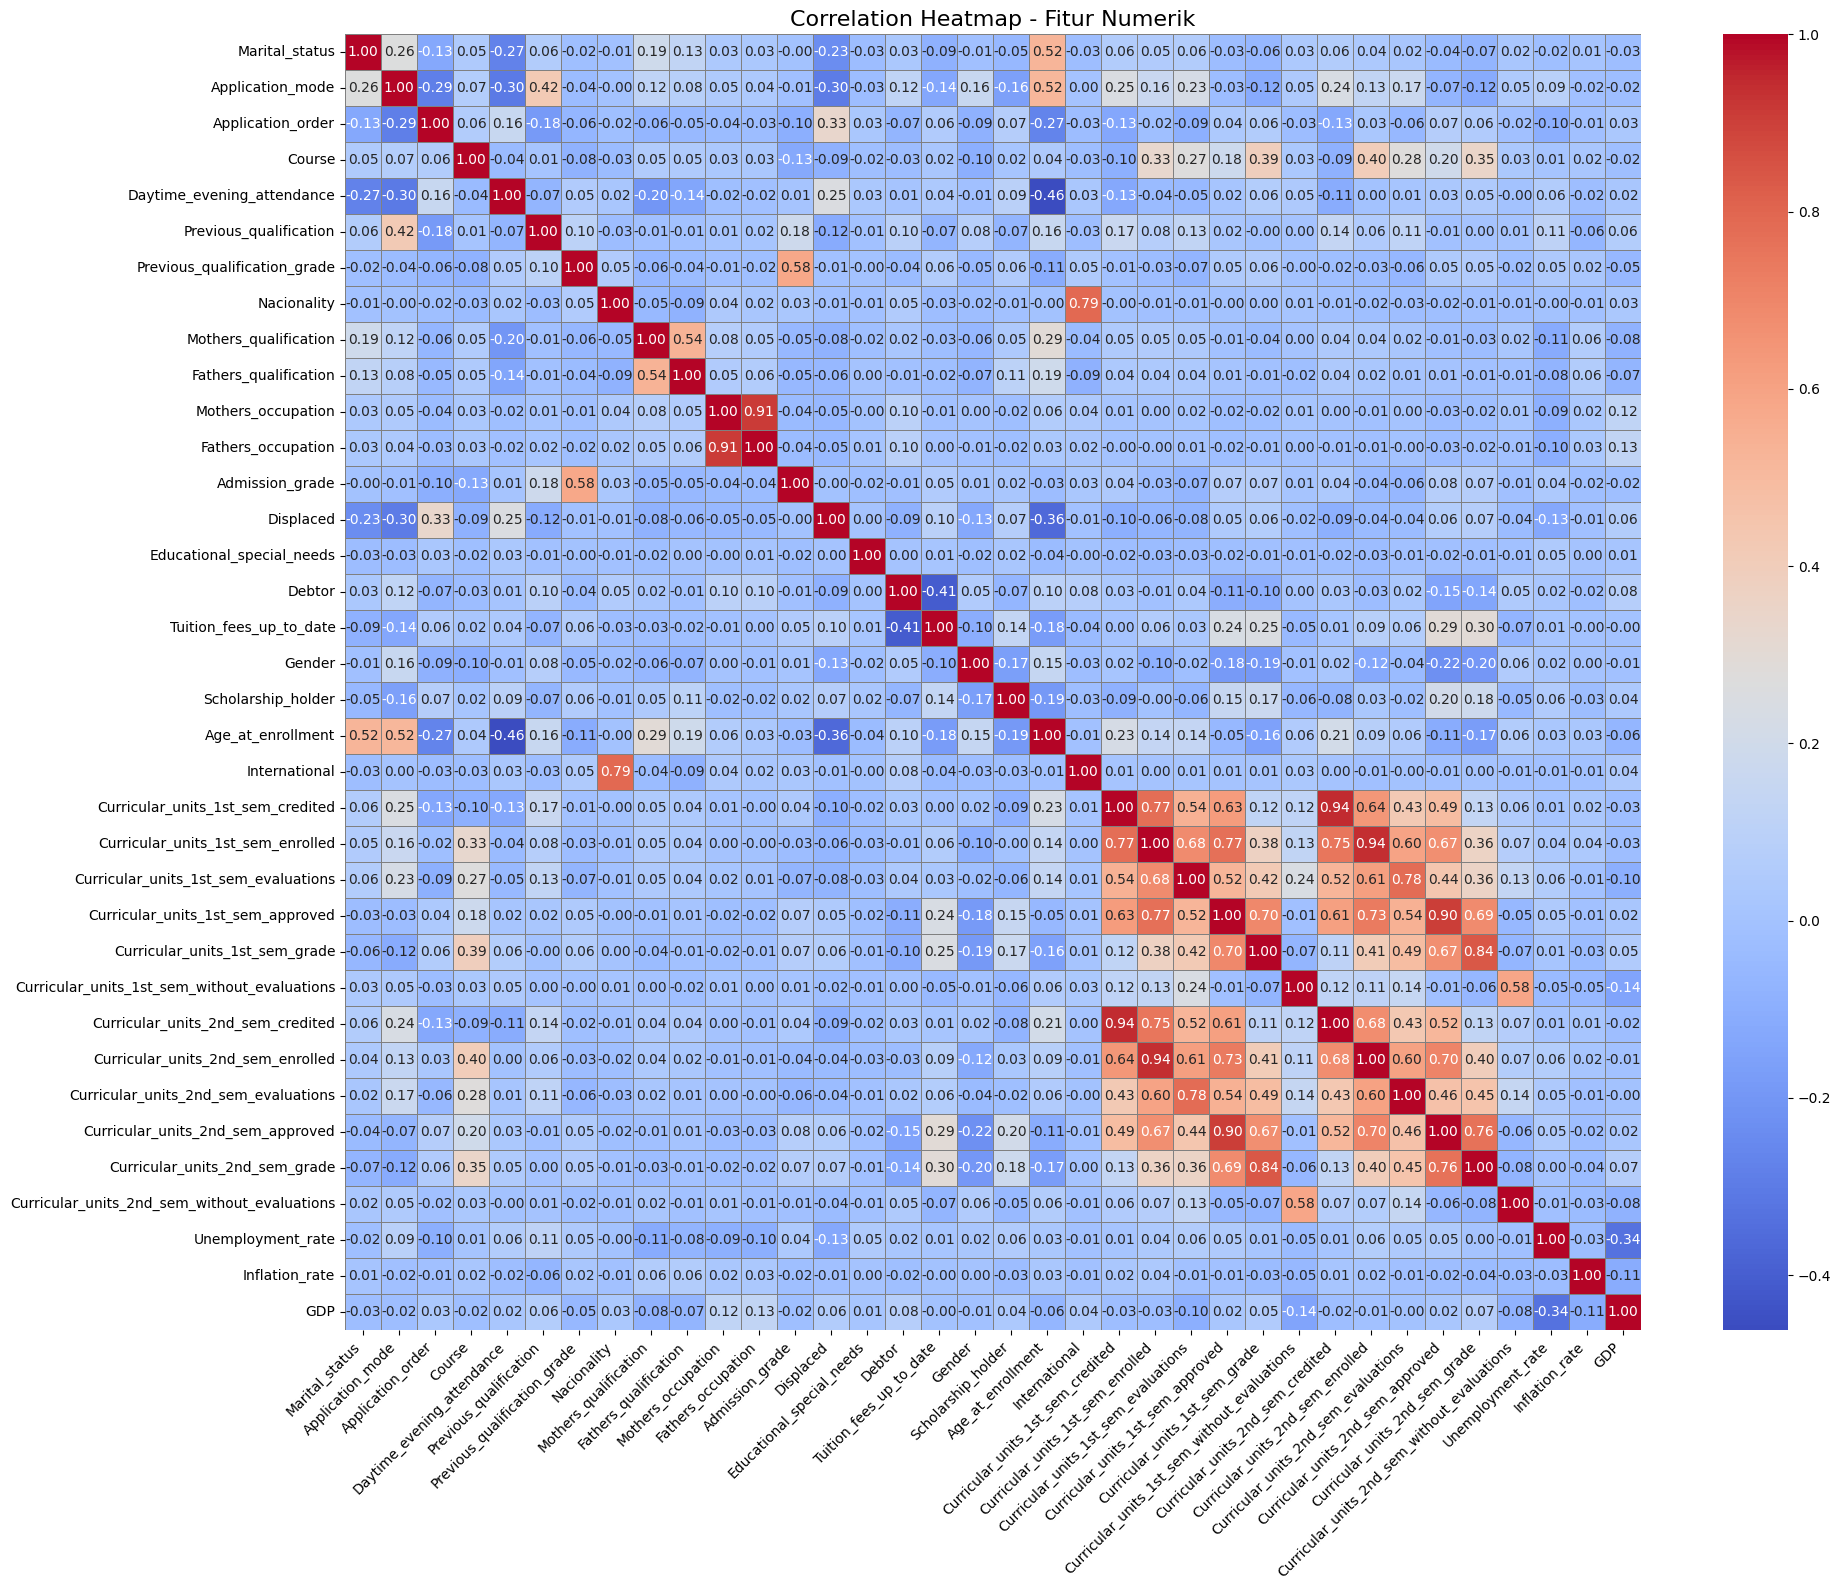

In [10]:
numerical_df = df[numerical_cols]

plt.figure(figsize=(20, 16))  # Perbesar area plot
sns.heatmap(numerical_df.corr(),
            annot=True,            # Tampilkan angka korelasi
            fmt=".2f",             # Dua angka desimal
            cmap='coolwarm',       # Skema warna
            cbar=True,             # Tampilkan colorbar
            square=True,           # Kotak per sel
            linewidths=0.5,        # Garis antar sel
            linecolor='gray')      # Warna garis antar sel

plt.title('Correlation Heatmap - Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Putar label X
plt.yticks(rotation=0)               # Label Y tetap horizontal
plt.tight_layout()
plt.show()

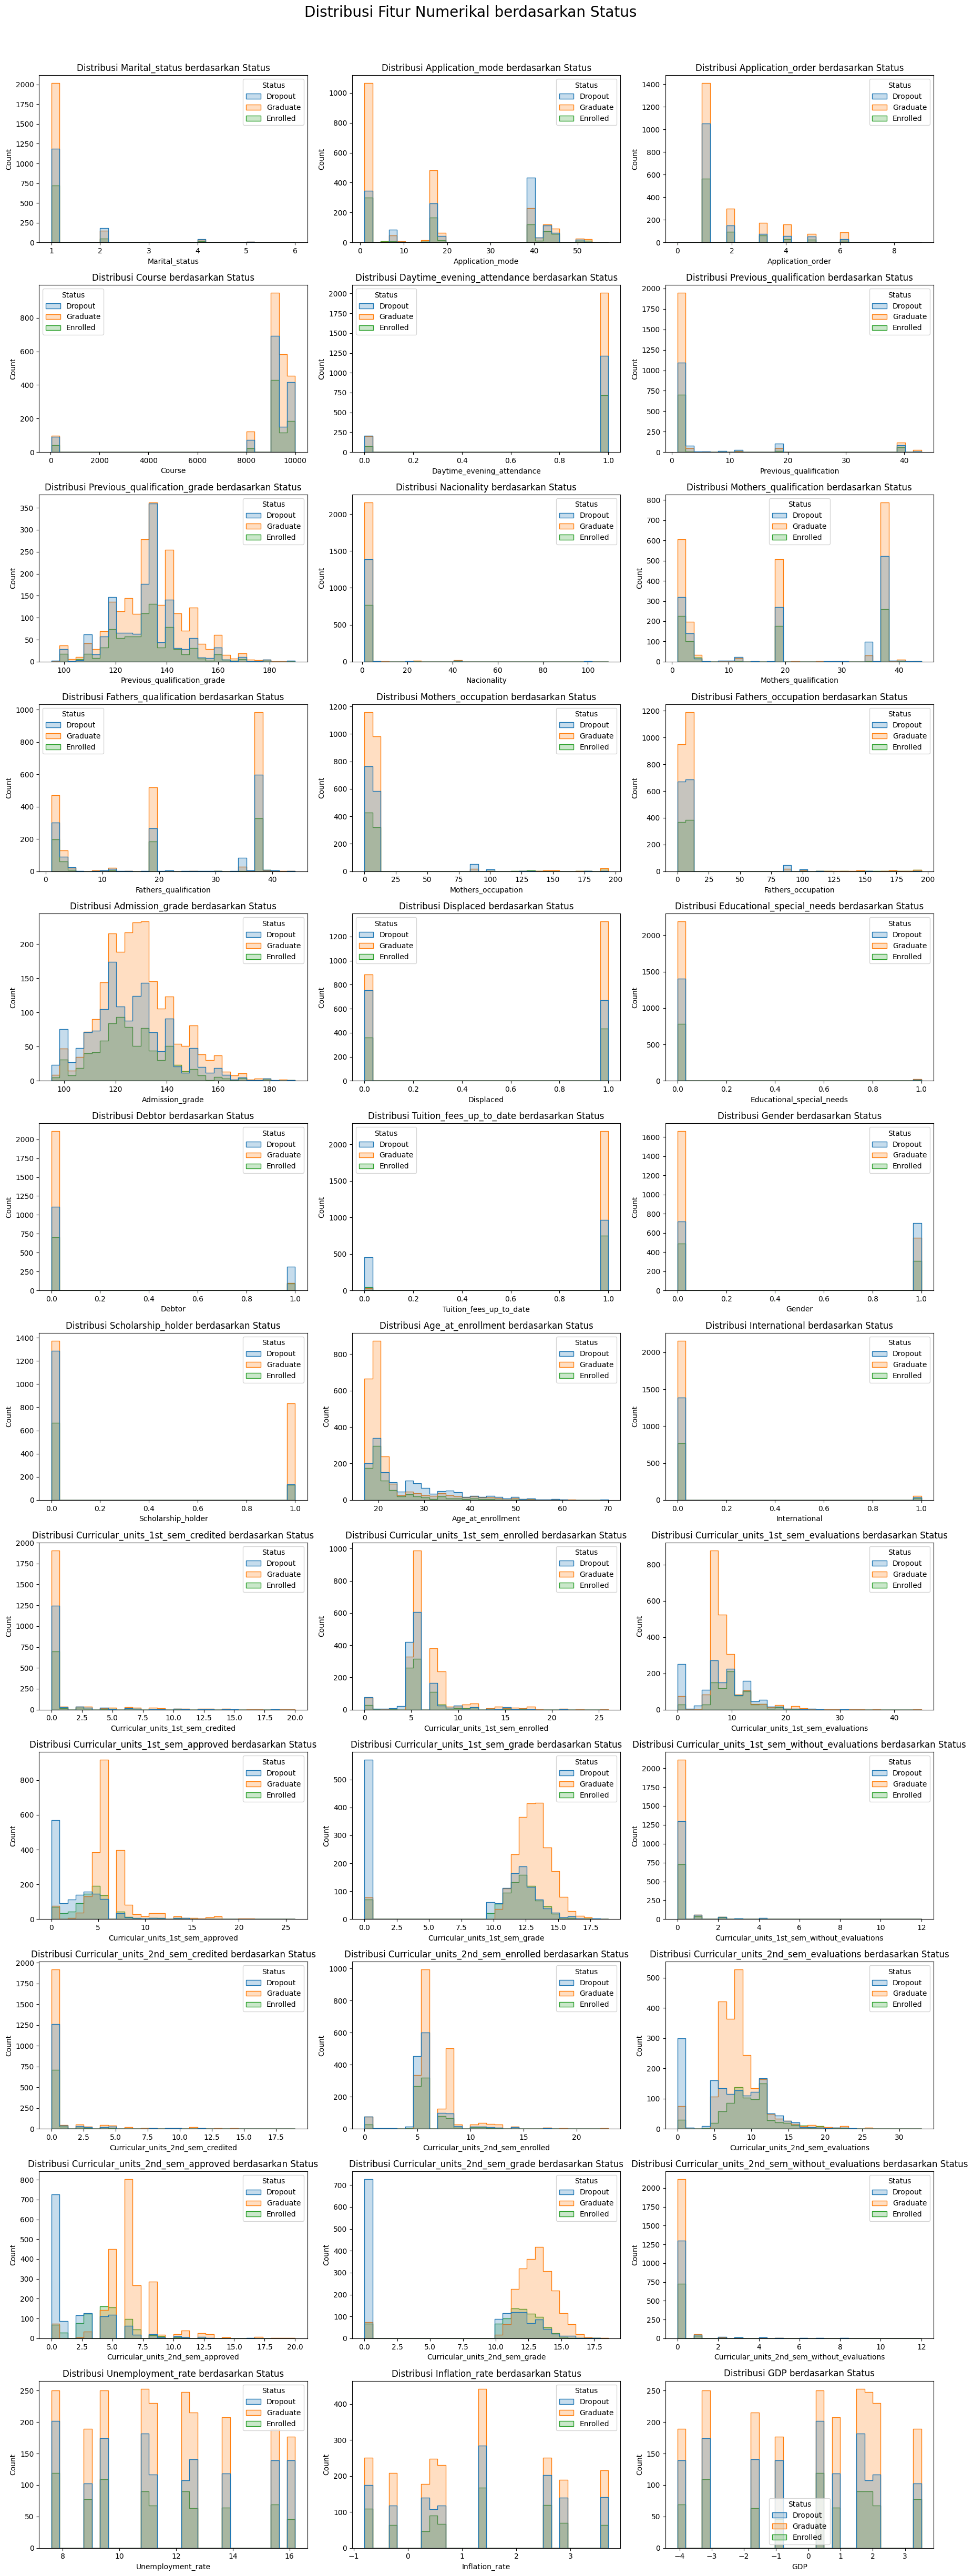

In [11]:
# Tentukan ukuran grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, hue='Status', bins=30, kde=False, element="step", stat="count")
    plt.title(f'Distribusi {col} berdasarkan Status')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle("Distribusi Fitur Numerikal berdasarkan Status", fontsize=20, y=1.02)
plt.show()


## Data Preparation / Preprocessing

In [12]:
selected_features = [
    'Marital_status',
    'Application_order',
    'Daytime_evening_attendance',
    'Previous_qualification_grade',
    'Admission_grade',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'Age_at_enrollment',
    'International',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

X = df[selected_features]
y = df['Status']


In [13]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [14]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_smote)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_encoded, random_state=42, stratify=y_encoded)

## Modeling

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[431  67  54]
 [ 41 429  82]
 [ 17  67 469]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       552
           1       0.76      0.78      0.77       552
           2       0.78      0.85      0.81       553

    accuracy                           0.80      1657
   macro avg       0.81      0.80      0.80      1657
weighted avg       0.81      0.80      0.80      1657



In [19]:
# Simpan model ke file model.pkl
joblib.dump(model, 'model.pkl')
joblib.dump(le, 'encoder.pkl')

['encoder.pkl']